### Setup and Yolov4 Training

In [ ]:
#-------------------------------------------------------------------
# Run this to get git lfs 
# Required to download code & weigths for demo/verification purposes
#-------------------------------------------------------------------

!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,773 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#-------------------------------------------------------------------
# Initialize the git lfs
#-------------------------------------------------------------------

!git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.


In [ ]:
#-------------------------------------------------------------------
# Clone the darknet repo with requried configuration files
#-------------------------------------------------------------------

!git lfs clone https://github.com/nitinrameshuf/darknet.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'darknet'...
remote: Enumerating objects: 2582, done.
remote: Counting objects: 100% (2582/2582), done.
remote: Compressing objects: 100% (2280/2280), done.
remote: Total 2582 (delta 307), reused 2564 (delta 291), pack-reused 0
Receiving objects: 100% (2582/2582), 269.23 MiB | 33.96 MiB/s, done.
Resolving deltas: 100% (307/307), done.
Checking out files: 100% (3380/3380), done.
Git LFS: (5 of 5 files) 894.63 MB / 894.63 MB


In [ ]:
#-------------------------------------------------------------------
# Move into the darknet folder
#-------------------------------------------------------------------

%cd darknet/

/content/darknet


In [ ]:
#-------------------------------------------------------------------
# Run the darknet Makefile
#-------------------------------------------------------------------

!make

mkdir -p ./obj/
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-var

In [ ]:
#-------------------------------------------------------------------
# Setting up the train and validation set files
#-------------------------------------------------------------------

import os
%cd /content/darknet/
%cp /content/darknet/humanproject-1/train/_darknet.labels data/obj.names
%mkdir data/obj
%cp /content/darknet/humanproject-1/train/*.jpg data/obj/
%cp /content/darknet/humanproject-1/valid/*.jpg data/obj/
%cp /content/darknet/humanproject-1/train/*.txt data/obj/
%cp /content/darknet/humanproject-1/valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('/content/darknet/humanproject-1' + '/train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('/content/darknet/humanproject-1' + '/valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

/content/darknet


In [ ]:
#-------------------------------------------------------------------
# Train the Yolo Model with the provided dataset to detect humans
#-------------------------------------------------------------------

!./darknet detector train data/obj.data cfg/custom-yolov4-detector.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
Loaded: 0.000049 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 98.48 %, best = 98.48 % 
 1128: 0.456422, 0.281146 avg loss, 0.001000 rate, 3.226882 seconds, 54144 images, 0.946001 hours left
Loaded: 0.000068 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 98.48 %, best = 98.48 % 
 1129: 0.393498, 0.292381 avg loss, 0.001000 rate, 3.120817 seconds, 54192 images, 0.944357 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 98.48 %, best = 98.48 % 
 1130: 0.229518, 0.286095 avg loss, 0.001000 rate, 3.132651 seconds, 54240 images, 0.942465 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 1.468652 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 1200 iterations) 
 Last accuracy mAP@0.5 = 98.48 %, best = 9

In [ ]:
#-------------------------------------------------------------------
# A basic function to display annotated image after detection
# Library: Matplotlib
#-------------------------------------------------------------------
import cv2
import matplotlib.pyplot as plt
def imShow(path):
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

### Result: Run at 48 FPS - 97.7% Accuracy

In [ ]:
#-------------------------------------------------------------------
#Running the Yolov4 on multiple images to check Accuracy and FPS:
#-------------------------------------------------------------------

!./darknet detector test data/obj.data cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_47fps_fully_trained.weights -dont_show < test_both_types.txt > result.txt -benchmark
%run print_statistics.py

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv     64       1 x 1/ 1    208 x 20

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	          

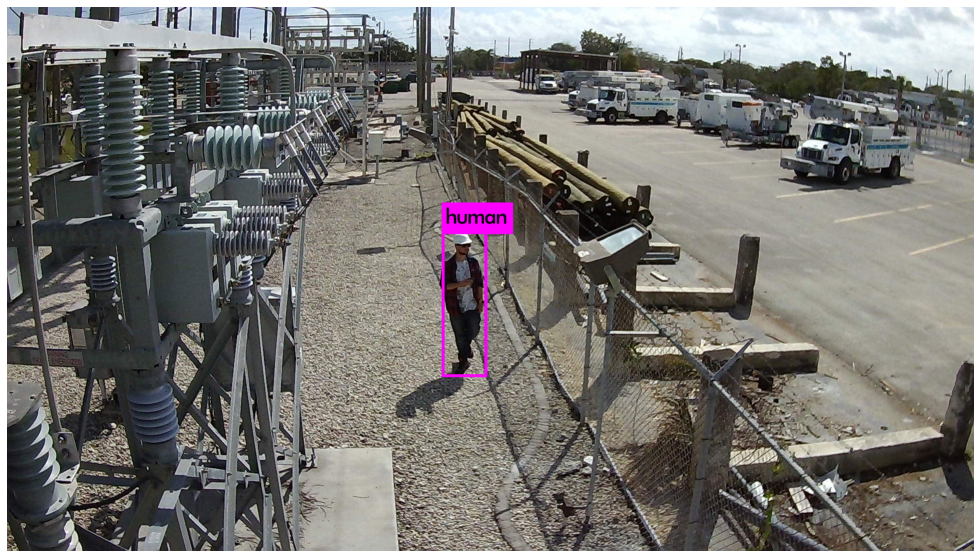

In [ ]:
#-------------------------------------------------------------------
#Running the Yolov4 on single image of person during daytime:
#-------------------------------------------------------------------

img_path = "/content/darknet/test/redperson1.jpg";

!./darknet detect cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_47fps_fully_trained.weights {img_path} -dont-show
imShow('/content/darknet/predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	          

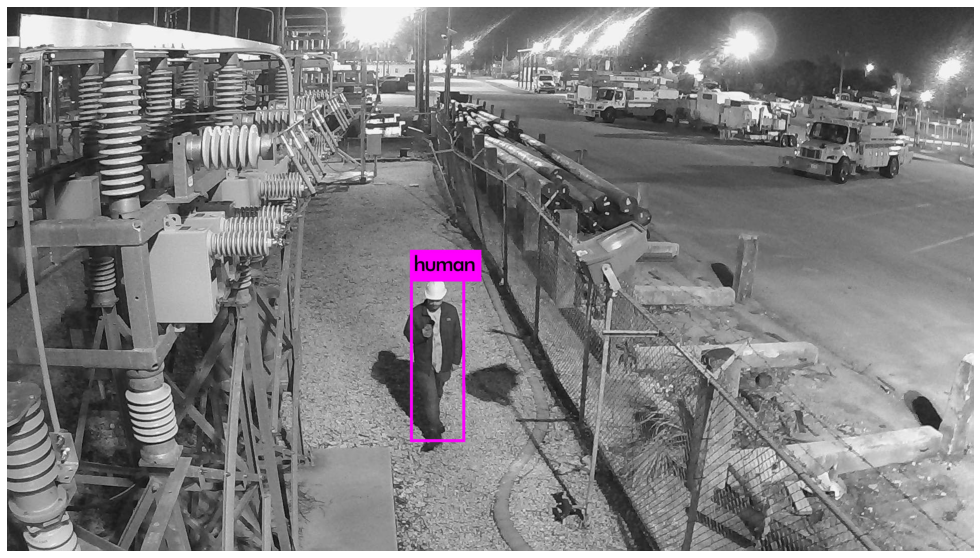

In [ ]:
#-------------------------------------------------------------------
#Running the Yolov4 on single image of person during nighttime:
#-------------------------------------------------------------------

img_path = "/content/darknet/test/greyperson1.jpg";

!./darknet detect cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_47fps_fully_trained.weights {img_path} -dont-show
imShow('/content/darknet/predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	          

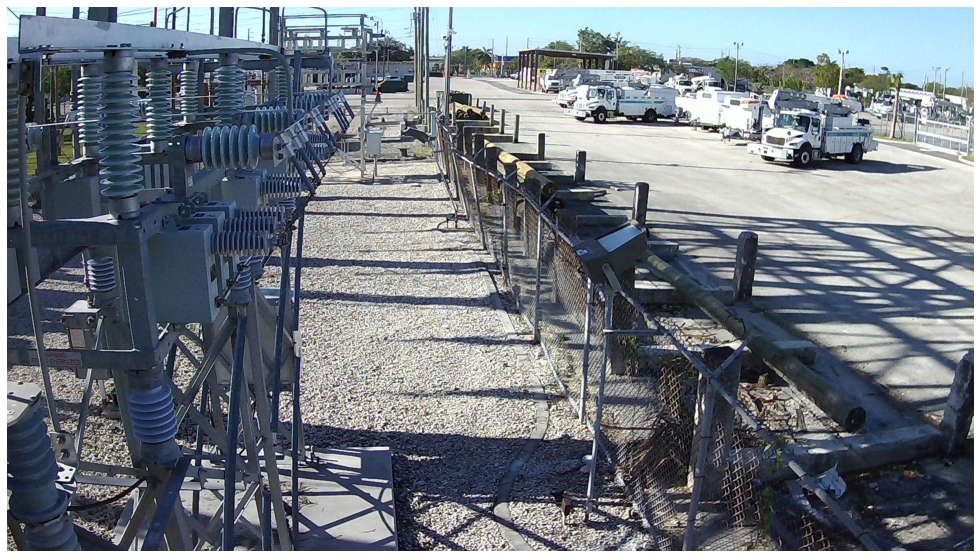

In [ ]:
#-------------------------------------------------------------------
#Running the Yolov4 on single image with no person in it:
#-------------------------------------------------------------------

img_path = "/content/darknet/test/noperson1.jpg";

!./darknet detect cfg/custom-yolov4-detector.cfg backup/custom-yolov4-detector_47fps_fully_trained.weights {img_path} -dont-show
imShow('/content/darknet/predictions.jpg')